<a href="https://colab.research.google.com/github/carolina-garay/Digital-Signal-Processing/blob/main/Resoluci%C3%B3n_Examen_Final_2%C2%B0parte_DSP2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
Cátedra = "Procesamiento de Señales" # @param {type:"string"}
Nombre_Apellido = "Carolina Garay" # @param {type:"string"}
Registro = 0 # @param {type:"integer"}
Fecha = "2023-12-01" # @param {type:"date"}

In [2]:
!pip install obspy

In [3]:
import obspy
from obspy.core import read
from obspy import read
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import welch

##Ejercicio: Dada una señal sísmica en formato "sac":

**a) cargue la señal**

In [4]:
# Cargar la señal sísmica
st1=read('/content/2021-01-31-0350-15S.PRECO_045_MOLE__HH_E_SAC')

**b) grafique la señal**

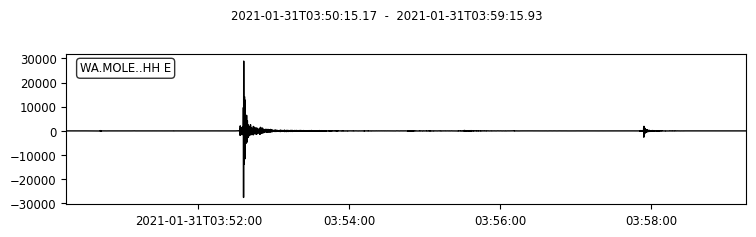

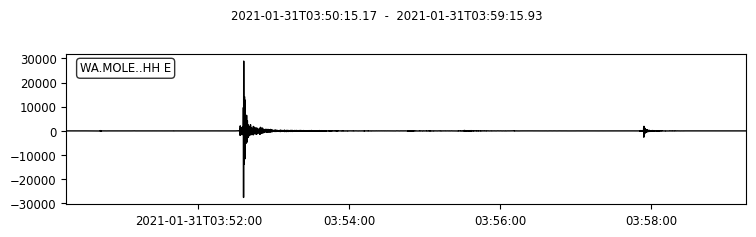

In [5]:
st1.plot()

**c) construya un filtro pasa bajo que elimine la frecuencia dominante, aplique una ventana "Hamming". Considere el orden correspondiente entre 13 y 53.**

In [6]:
#obtengo la traza
trace =st1[0]

#Obtener amplitudes
data= trace.data

#Obtener tasa de muestreo
sr = trace.stats.sampling_rate

#calcular la PSD de la señal original
frec,psd = welch(data, sr)

# Encontrar la frecuencia dominante (frecuencia de pico)
frec_dom= frec[np.argmax(psd)]
print(f'Frecuencia dominante: {frec_dom} Hz')


Frecuencia dominante: 4.296875 Hz


In [7]:
#imprimo tasa de muestreo
print("Tasa de muestreo:", sr)

Tasa de muestreo: 100.0


In [8]:
#Diseño del filtro
#Diseño del filtro1
orden_pasabajo1 = 13
frec_corte1 = 3.8

pasa_bajo1 = signal.firwin(orden_pasabajo1, frec_corte1, window ="hamming", fs= sr)

**d) construya un filtro pasa bajo butterworth que elimine la frecuencia dominante. Considere un orden 15.**

In [9]:
# Definir la frecuencia de corte y la tasa de muestreo para el filtro Butterworth
frec_corte_butt = 3.8
tasa_m = 100.0

# Calcular los coeficientes del filtro Pasa Bajo Butterworth
# Calcular los coeficientes del filtro Pasa Bajo Butterworth
orden_butt = 15 # Orden del filtro Butterworth
nyquist_frec = 0.5 * tasa_m
frec_norm = frec_corte_butt / nyquist_frec
b, a = signal.butter(orden_butt, frec_norm, btype='low', analog=False)

**e) grafique la respuesta en frecuencia de ambos filtros y explique sus diferencias si las hay**

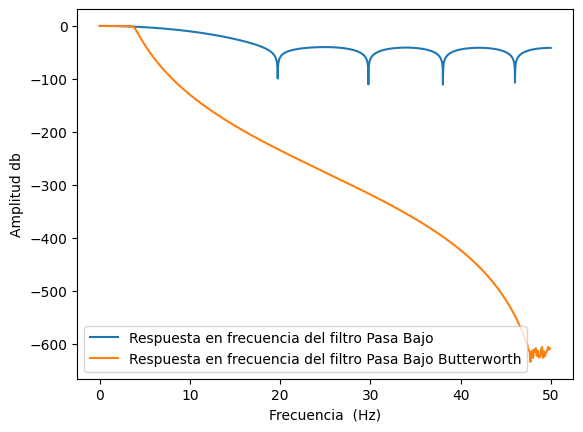

In [10]:
#Respuesta en frecuencia de ambos filtros

#Obtener Respuesta en frecuencia
frec_pasbaj1, resp_frec_pasabaj1 = signal.freqz(pasa_bajo1, worN =8000) #(pasa bajo1)
w, h = signal.freqz(b,a) #pasabajo Butterworth

#Graficar las respuestas
plt.plot(frec_pasbaj1 * sr / (2 * np.pi), 20*np.log10(abs(resp_frec_pasabaj1)), label="Respuesta en frecuencia del filtro Pasa Bajo")
plt.plot(w* sr / (2 * np.pi), 20*np.log10(abs(h)), label="Respuesta en frecuencia del filtro Pasa Bajo Butterworth")
plt.xlabel("Frecuencia  (Hz)")
plt.ylabel("Amplitud db")
plt.legend();
plt.show();

Observaciones:

El filtro diseñado con la ventana Hamming tine una respuesta en frecuencia que sigue la forma de esa ventana.

El filtro Butterworth presenta una respuesta en frecuencia más suave y monótona, ya que este tipo de filtro se caracteriza por una transición suave entre la banda de paso y la banda de rechazo.

**f) aplique los filtros a la señal y grafique ambas señales filtradas en un mismo gráfico considerando las respuestas en frecuencias. Explique lo que observa**

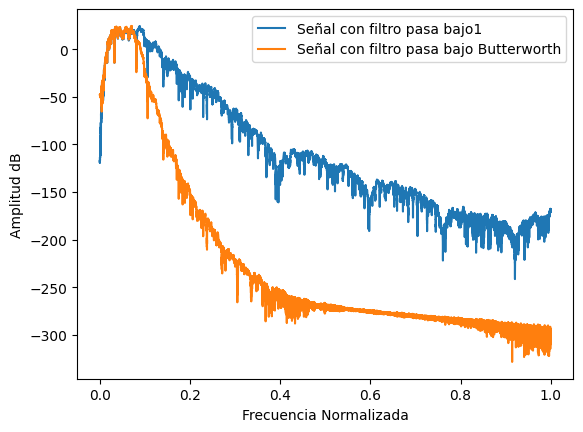

In [11]:
#aplicar los filtros
señal_filtrada1 = signal.lfilter(pasa_bajo1, 1, data)
señal_filtradaB = signal.lfilter(b,a, data)

#Graficar las respuestas en frecuencias de cada señal
plt.magnitude_spectrum(señal_filtrada1, scale='dB', label="Señal con filtro pasa bajo1")
plt.magnitude_spectrum(señal_filtradaB, scale='dB', label="Señal con filtro pasa bajo Butterworth")
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Amplitud dB')
plt.legend()
plt.show();


Observaciones:

La señal filtrada con el filtro Hamming muestra una atenuación gradual en la banda de rechazo.

La señal filtrada con el filtro Butterworth muestra una atenuación más abrupta en la banda de rechazo.